# Implementation Bagging Classifier From Scratch
__Author__ : Mohammad Rouintan , 400222042

__Course__ : Undergraduate Machine Learning Course

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Bagging
Bagging is an abbreviation of Bootstrap Aggregating. The conventional bagging algorithm involves generating $n$ different bootstrap training samples with replacement. And training the algorithm on each bootstrapped algorithm separately and then aggregating the predictions at the end.

Bagging is used for reducing Overfitting in order to create strong learners for generating accurate predictions. Unlike boosting, bagging allows replacement in the bootstrapped sample.

This ensemble methodology produces a stronger compound classifier since it combines the results of individual classifiers to come up with an improved one.


In [3]:
from sklearn.base import clone
from sklearn.tree import DecisionTreeClassifier

In [51]:
class Bagging():
    # Constructor
    def __init__(self, estimator=DecisionTreeClassifier(), n_estimators=10):
        self.estimator = estimator
        self.n_estimators = n_estimators
        self.classifiers = list()


    # Bootstraping Data
    def bootstraped_data(self, data):
        final_data = dict()
        sample_size = data.shape[0]

        index = [idx for idx in range(sample_size)]
        for i in range(self.n_estimators):
            indices = np.random.choice(index, replace=True, size=sample_size)
            sample = data[indices, :]

            other_indices = list(set(index) - set(indices))
            other_sample = np.array([])
            if other_indices:
                other_sample = data[other_indices, :]

            final_data['Sample_' + str(i)] = {'Boot': sample, 'Other': other_sample}

        return final_data


    # Fit
    def fit(self, X, y):
        data = np.concatenate((X, y.reshape(-1, 1)), axis=1)
        boot_data = self.bootstraped_data(data)

        for boot in boot_data:
            classifier = clone(self.estimator)
            classifier.fit(boot_data[boot]['Boot'][:, :-1], boot_data[boot]['Boot'][:, -1].reshape(-1, 1))
            self.classifiers.append(classifier)

    
    # Predict
    def predict(self, X):
        if not self.classifiers:
            print('Your model is not trained')
            return
        
        predictions = list()
        for classifier in self.classifiers:
            y_pred = classifier.predict(X)
            predictions.append(y_pred.reshape(-1, 1))
        
        y_predict = np.round(np.mean(np.concatenate(predictions, axis=1), axis=1)).astype(int)
        return y_predict


### Test on Penguins data

In [7]:
penguins = pd.read_csv('Datasets/penguins.csv')
penguins.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


In [8]:
penguins.dropna(axis=0, inplace=True)
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [12]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split

ord_enc = OrdinalEncoder()
penguins_X = penguins[['bill_length_mm', 'bill_depth_mm']].values
penguins_y = penguins['species'].values
penguins_y = ord_enc.fit_transform(penguins_y.reshape(-1, 1)).astype(np.int32).squeeze()
x_train, x_test, y_train, y_test = train_test_split(penguins_X, penguins_y, test_size=0.2, random_state=40) 

In [52]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

bagging_classifier = make_pipeline(StandardScaler(), Bagging())

In [53]:
bagging_classifier.fit(x_train, y_train)
y_pred = bagging_classifier.predict(x_test)

accuracy is 0.98507


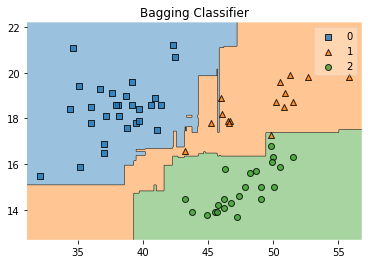

In [54]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from mlxtend.plotting import plot_decision_regions

accuracy = accuracy_score(y_pred, y_test)
# precision = precision_score(y_pred, y_test)
# recall = recall_score(y_pred, y_test)
print(f'accuracy is {accuracy:.5f}')
# print(f'precision is {precision:.5f}')
# print(f'recall is {recall:.5f}')

plot_decision_regions(x_test, y_test, clf=bagging_classifier)
plt.title('Bagging Classifier')
plt.show()


In [55]:
from sklearn.ensemble import BaggingClassifier
bagging_classifier_scikit = make_pipeline(StandardScaler(), BaggingClassifier())

In [56]:
bagging_classifier_scikit.fit(x_train, y_train)
y_pred = bagging_classifier_scikit.predict(x_test)

accuracy is 0.98507


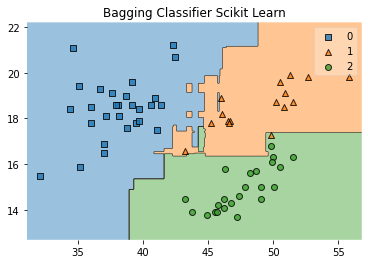

In [57]:
accuracy = accuracy_score(y_pred, y_test)
# precision = precision_score(y_pred, y_test)
# recall = recall_score(y_pred, y_test)
print(f'accuracy is {accuracy:.5f}')
# print(f'precision is {precision:.5f}')
# print(f'recall is {recall:.5f}')

plot_decision_regions(x_test, y_test, clf=bagging_classifier_scikit)
plt.title('Bagging Classifier Scikit Learn')
plt.show()


## Conclusion for this problem

**Bagging Advantages**:
* Improves stability & accuracy of machine learning algorithms
* Reduces variance
* Overcomes overfitting
* Improved misclassification rate of the bagged classifier
* In noisy data environments bagging outperforms boosting
<!-- end of the list -->

**Bagging Disadvantages**:
* Bagging works only if the base classifiers are not bad to begin with. Bagging bad classifiers can further degrade performance